## 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data_sensors = pd.read_csv("sensor.csv")

In [3]:
data_sensors.shape

(220320, 55)

In [4]:
data_sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [5]:
data_sensors.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [6]:
100*data_sensors['machine_status'].value_counts()/len(data_sensors)

NORMAL        93.425926
RECOVERING     6.570897
BROKEN         0.003177
Name: machine_status, dtype: float64

In [7]:
columns = [col for col in data_sensors.columns if not col.find('sensor')]
for col in columns:
    data_sensors[col] = data_sensors[col].fillna(data_sensors[col].mean())

In [8]:
data_sensors.isna().sum()

Unnamed: 0             0
timestamp              0
sensor_00              0
sensor_01              0
sensor_02              0
sensor_03              0
sensor_04              0
sensor_05              0
sensor_06              0
sensor_07              0
sensor_08              0
sensor_09              0
sensor_10              0
sensor_11              0
sensor_12              0
sensor_13              0
sensor_14              0
sensor_15         220320
sensor_16              0
sensor_17              0
sensor_18              0
sensor_19              0
sensor_20              0
sensor_21              0
sensor_22              0
sensor_23              0
sensor_24              0
sensor_25              0
sensor_26              0
sensor_27              0
sensor_28              0
sensor_29              0
sensor_30              0
sensor_31              0
sensor_32              0
sensor_33              0
sensor_34              0
sensor_35              0
sensor_36              0
sensor_37              0


In [9]:
#Removing sensor_15
data_sensors = data_sensors.drop(['sensor_15','Unnamed: 0'],axis=1)

## showing with X mark in plots the statut Broken 

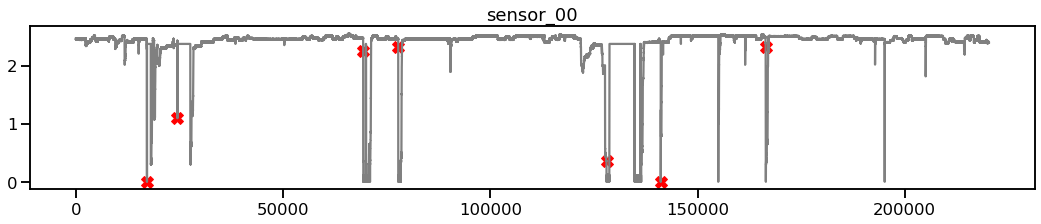

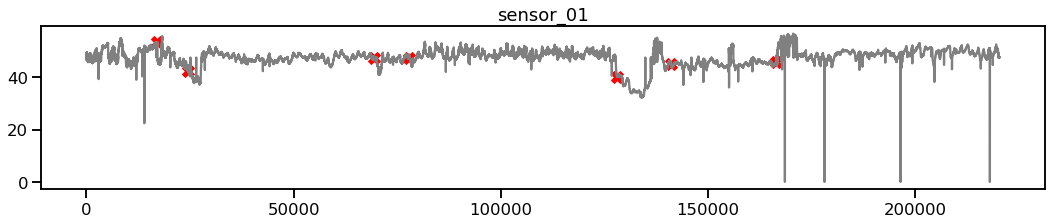

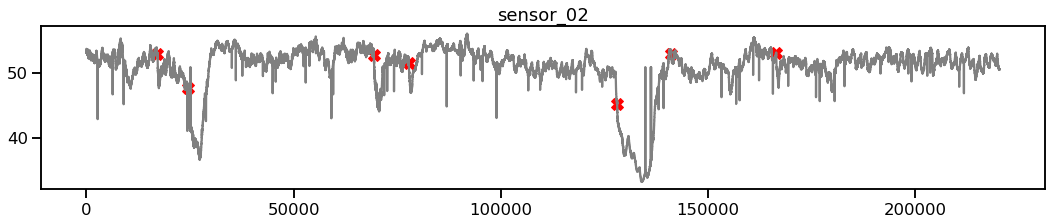

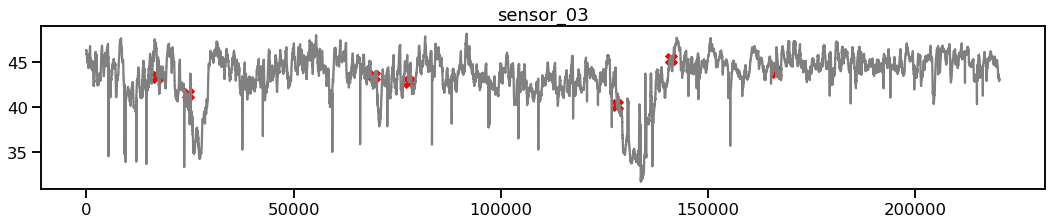

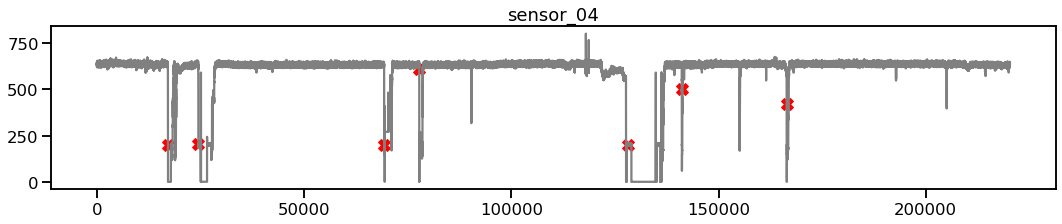

In [10]:
#check where the machine is broken according to sensor
dfBroken = data_sensors[data_sensors['machine_status']=='BROKEN']
dfSensors = data_sensors.drop(['machine_status'], axis=1)
sensorNames=dfSensors.columns
for sensor in sensorNames[1:6]:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(dfBroken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(data_sensors[sensor], color='grey')
    _ = plt.title(sensor)
    plt.show()

<AxesSubplot:>

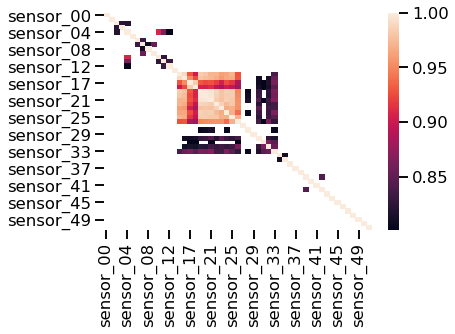

In [11]:
#Correlations
corr = data_sensors.corr()
corr80 = corr[abs(corr)> 0.8]
sns.heatmap(corr80)

## PCA(The principal components) : a collection of points in a real coordinate space are a sequence of p unit vectors, where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors. 
## PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. 

## Fit the model with data and apply the dimensionality reduction.

In [12]:
from sklearn.decomposition import PCA

data = data_sensors[[sensor for sensor in data_sensors.columns.tolist() if not sensor.find('sensor')]]

pca = PCA(n_components=2)
data_reduce = pca.fit_transform(data)

## The pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension.

In [13]:
print(pca.explained_variance_ratio_)


[0.73422252 0.0825578 ]


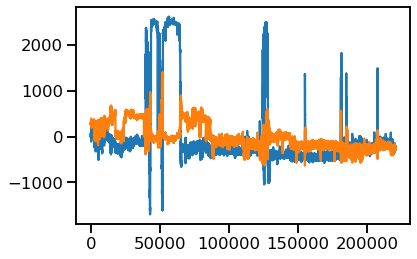

In [14]:
import matplotlib.pyplot as plt
plt.plot(data_reduce)

## The vector autoregressive (VAR) model is a workhouse multivariate time series model that relates current observations of a variable with past observations of itself and past observations of other variables in the system

## in the VAR model we will use the method 'ordinary least squares' (OLS) or linear least squares its a method for estimating the unknown parameters in a linear regression model. 

## This method minimizes the sum of squared vertical distances between the observed responses in the dataset and the responses predicted by the linear approximation. 

In [15]:
from statsmodels.tsa.api import VAR
model = VAR(pd.DataFrame(data_reduce))
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 25, May, 2022
Time:                     15:26:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    11.9096
Nobs:                     220318.    HQIC:                   11.9093
Log likelihood:      -1.93713e+06    FPE:                    148623.
AIC:                      11.9092    Det(Omega_mle):         148616.
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.001833         0.058223           -0.031           0.975
L1.0          0.803884         0.002608          308.225           0.000
L1.1          0.065400         0.004099           15.956           0.000
L2.0          0.195675 

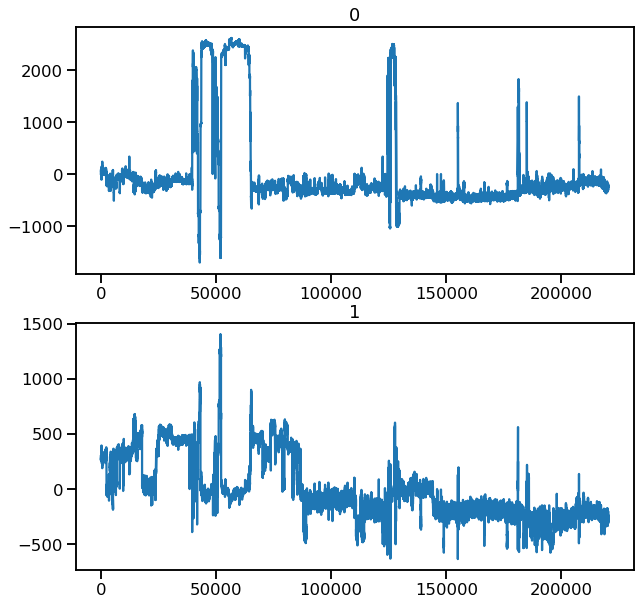

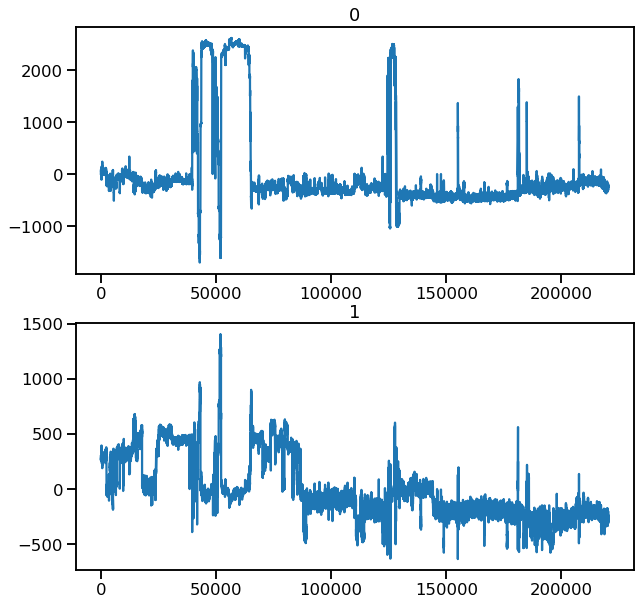

In [16]:
results.plot()


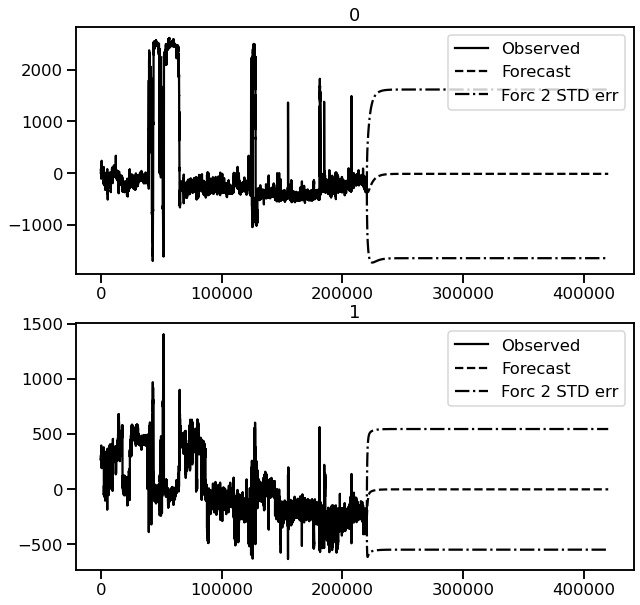

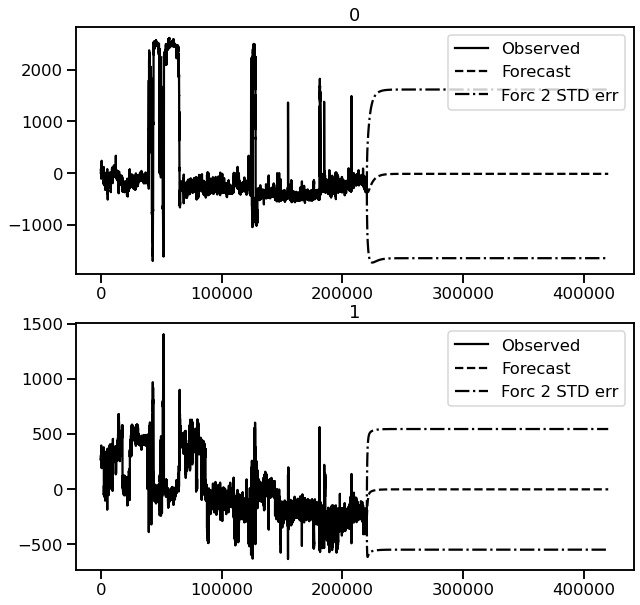

In [17]:
results.plot_forecast(200000)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

from datetime import datetime
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
data_sensors = data_sensors.set_index('timestamp')

In [20]:
MS_class_dict = {"BROKEN": 0, "NORMAL": 1, "RECOVERING": 2}
data_sensors['machine_status'] = data_sensors['machine_status'].map(MS_class_dict)
data_sensors.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,1
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,1
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,1


In [21]:
samples = pd.get_dummies(data_sensors)
samples.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,1
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,1
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,1


In [22]:
labels = np.where(data_sensors['machine_status'] == 0, 0, 1)

In [23]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(samples)

In [24]:
df_scaled

array([[0.9671944 , 0.83014531, 0.87665996, ..., 0.22166027, 0.17857144,
        0.5       ],
       [0.9671944 , 0.83014531, 0.87665996, ..., 0.22166027, 0.17857144,
        0.5       ],
       [0.95908931, 0.83473604, 0.87665996, ..., 0.21987499, 0.18095238,
        0.5       ],
       ...,
       [0.9401777 , 0.84085688, 0.75901303, ..., 0.15995782, 0.21011906,
        0.5       ],
       [0.94403723, 0.84085688, 0.75901312, ..., 0.15995782, 0.21220233,
        0.5       ],
       [0.9401777 , 0.84085688, 0.75901312, ..., 0.15995782, 0.21220233,
        0.5       ]])

In [25]:
norm_samples = df_scaled[labels == 1]  # normal or recovering
attack_samples  = df_scaled[labels == 0]  # broken machine

norm_labels = labels[labels == 1]
attack_labels  = labels[labels == 0]

In [26]:

len_norm = len(norm_samples)
len_norm_train = int(0.8 * len_norm)
X_train = norm_samples[:len_norm_train]


X_test_norm = norm_samples[len_norm_train:]
len_attack_test = len(X_test_norm) # we will use the same number
X_test_attack = attack_samples[:len_attack_test]

X_test = np.concatenate([X_test_norm, X_test_attack])
y_test = np.ones(len(X_test))
y_test[:len(X_test_norm)] = 0

In [27]:
def get_error_term(v1, v2, _rmse=True):
    if _rmse:
        return np.sqrt(np.mean((v1 - v2) ** 2, axis=1))
    #return MAE
    return np.mean(abs(v1 - v2), axis=1)

In [28]:
def sample(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [29]:
original_dim = X_train.shape[1]
input_shape = (original_dim,)
intermediate_dim = int(original_dim / 2)
latent_dim = int(original_dim / 3)

In [30]:
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z = Lambda(sample, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, z, name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 52)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 26)           1378        encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 17)           459         dense[0][0]                      
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 17)           459         dense[0][0]                      
____________________________________________________________________________________________

In [31]:
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 17)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 26)                468       
_________________________________________________________________
dense_2 (Dense)              (None, 52)                1404      
Total params: 1,872
Trainable params: 1,872
Non-trainable params: 0
_________________________________________________________________


In [32]:
outputs = decoder(encoder(inputs))
vae_model = Model(inputs, outputs, name='vae')

In [33]:
def vae_loss(x, x_decoded_mean):
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.square(K.exp(z_log_var)), axis=-1) 
    total_loss = K.mean(reconstruction_loss + kl_loss)    
    return total_loss
opt = optimizers.Adam(learning_rate=0.0001, clipvalue=0.5)
vae_model.compile(optimizer=opt, loss=vae_loss)
vae_model.summary()
results = vae_model.fit(X_train, X_train,
                        shuffle=True,
                        epochs=32,
                        batch_size=256)

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 52)]              0         
_________________________________________________________________
encoder (Functional)         (None, 17)                2296      
_________________________________________________________________
decoder (Functional)         (None, 52)                1872      
Total params: 4,168
Trainable params: 4,168
Non-trainable params: 0
_________________________________________________________________
Train on 176250 samples
Epoch 1/32
176250/176250 [==============================] - 1s 6us/sample - loss: 915.0283
Epoch 2/32
176250/176250 [==============================] - 1s 6us/sample - loss: 231.0259
Epoch 3/32
176250/176250 [==============================] - 1s 6us/sample - loss: 141.0029
Epoch 4/32
176250/176250 [==============================] - 1s 6us/sample - loss: 107.4287
Epo

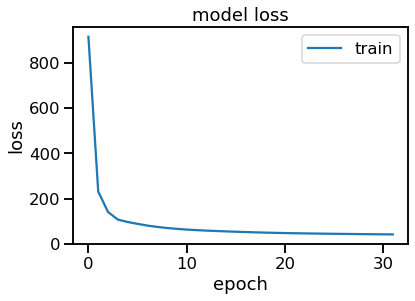

In [34]:
plt.plot(results.history['loss'])
#plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
plt.show()

In [35]:
X_train_pred = vae_model.predict(X_train)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [36]:
mae_vector = get_error_term(X_train_pred, X_train, _rmse=False)
print(f'Avg error {np.mean(mae_vector)}\nmedian error {np.median(mae_vector)}\ndataset: {np.quantile(mae_vector, 0.99)}')
print(f'setting threshold on { np.quantile(mae_vector, 0.99)} ')

error_thresh = np.quantile(mae_vector, 0.99)

Avg error 0.027563273051181326
median error 0.02475720238532313
dataset: 0.06637511002066278
setting threshold on 0.06637511002066278 


In [38]:
from sklearn.metrics import classification_report
X_pred = vae_model.predict(X_test)
mae_vector = get_error_term(X_pred, X_test, _rmse=False)
anomalies = (mae_vector > error_thresh)
print(classification_report(y_test, anomalies))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     44063
         1.0       0.01      0.71      0.03         7

    accuracy                           0.99     44070
   macro avg       0.51      0.85      0.51     44070
weighted avg       1.00      0.99      1.00     44070



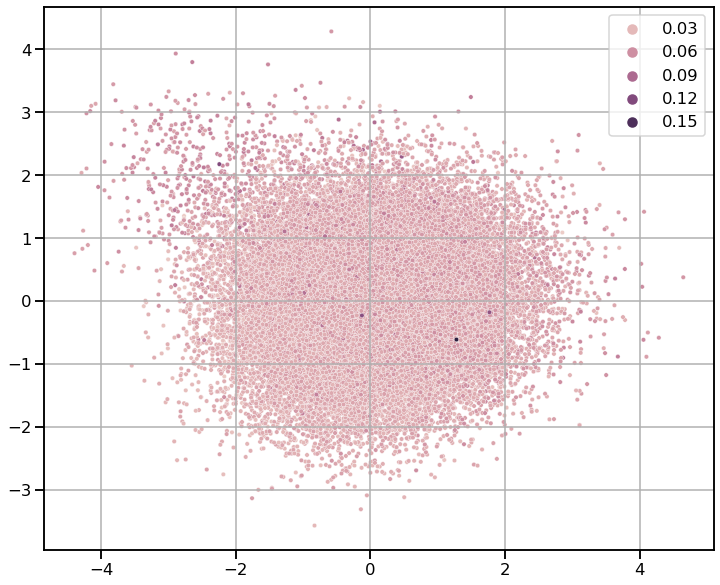

In [39]:
X_encoded = encoder.predict(X_test)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_transform = pca.fit_transform(X_encoded)
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_transform[:, 0], y=X_transform[:, 1], s=20, hue=mae_vector)
plt.grid()
plt.show()

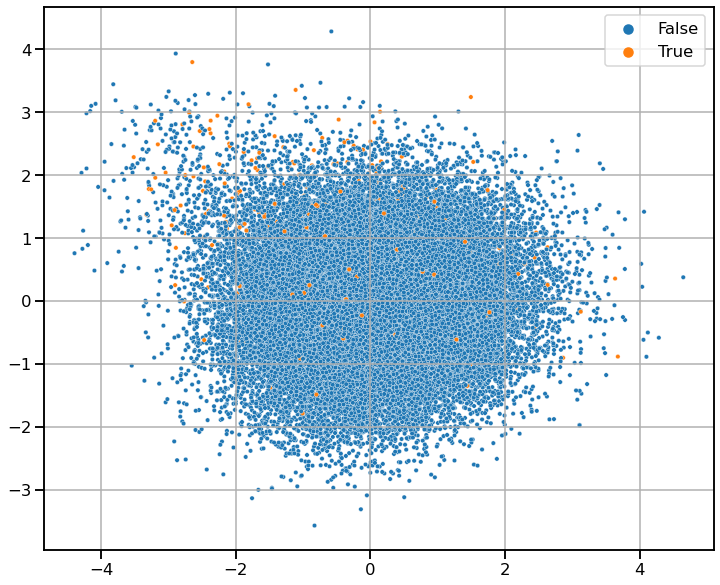

In [40]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_transform[:, 0], y=X_transform[:, 1], s=20, hue=anomalies)
plt.grid()
plt.show()